# Brief tutorial on how to execute GALFRB

In [1]:
# load the main module of GALFRB
from galfrb import generator as GFRB

#load the helper functions
from galfrb import utils as utls

**Load tabulated probability density in the sfr-mstar-z space to minimize execution time**

In [2]:
p_dens_params, p_prob_arr, p_z_arr, p_logm_arr, p_logsfr_arr = utls.load_stored_leja_nn('../src/galfrb/data/Leja_NN_z11_sfr120_mstar120_data.h5')


## Alternatively, you can compute the prpobability density with the desired resolution as follows :

# p_dens_params = {
#             "nlogm"  : 120,#120, 
#             "nsfr"   : 120,#140,
#             "dz"     : 0.1,#0.1,
#             "ndummy" : 31,
#             "mmin"   : 6.5, 
#             "mmax"   : 12.5,
#             "sfrmin" : -3.,
#             "sfrmax" : 3.,
#             "zmin"   : 0.2, 
#             "zmax"   : 1.2
#         }

# p_prob_arr, p_z_arr, p_logm_arr, p_logsfr_arr = utls.load_leja_posterior(dens_params=p_dens_params)


    The stored star formation density was sampled using the following parameters:
    nlogm=120, nsfr=120, dz=0.1
    ndummy=31
    mmin=6.5, mmax=12.5
    sfrmin=-3.0, sfrmax=3.0
    zmin=0.2, zmax=1.2
    Return an array with shape [nlogm, nsfr, nz].
    If another resolution is desired, please use utls.load_leja_posterior()"
    


**Load probability density in the color-sfr plane**

In [3]:
sdss_density_logsfr_color, sdss_color_grid, sdss_logsfr_grif = utls.generate_density_sfr_color(sfr_range=(-3,2), 
                                                                                               color_range=(-0.6,1.0), 
                                                                                               color_bins=100, 
                                                                                               lgsfr_cut=-3.5)



Input Parameters:
  zbins:                 [0.0, 0.2, 0.4, 0.7]
  zgal:                  [0.1, 0.3, 0.55]
  Nsample:               10000
  weight:                SFR
  save:                  False
  mfunc_ref:             Leja
  mfunc_mstar0:          100000.0
  mfunc_slope:           0
  sfr_ref:               Leja
  mode (sfr):            nn
  posterior(sampling):   True
  completeness_handling: sharma-like
  sigma_norm:            12.0
  n_realizations:        5
  nz_bins:               100
  transparency:          0.2
  data_source:           Sharma_full
  ks_test:               True
  sfr_sampling:          True
  space_dist:            uniform-vol
  z_min (spatial):       None
  z_max (spatial):       None
  p_dens_params:         {'nlogm': 120, 'nsfr': 120, 'dz': 0.1, 'ndummy': 31, 'mmin': 6.5, 'mmax': 12.5, 'sfrmin': -3.0, 'sfrmax': 3.0, 'zmin': 0.2, 'zmax': 1.2}
  ml_sampling:           advanced
  prescribed_ml_func:    None
  Kr_correction:         True
  plot_M_L:          

Sampling posterior for 0.0 $<$ z $\leq$ 0.2: 100%|██████████| 5/5 [00:44<00:00,  8.98s/it]


The ks-test has returned a p-value equal to 4.75e-01.


Sampling posterior for 0.2 $<$ z $\leq$ 0.4: 100%|██████████| 5/5 [00:36<00:00,  7.26s/it]


The ks-test has returned a p-value equal to 6.03e-02.


Sampling posterior for 0.4 $<$ z $\leq$ 0.7: 100%|██████████| 5/5 [00:36<00:00,  7.22s/it]


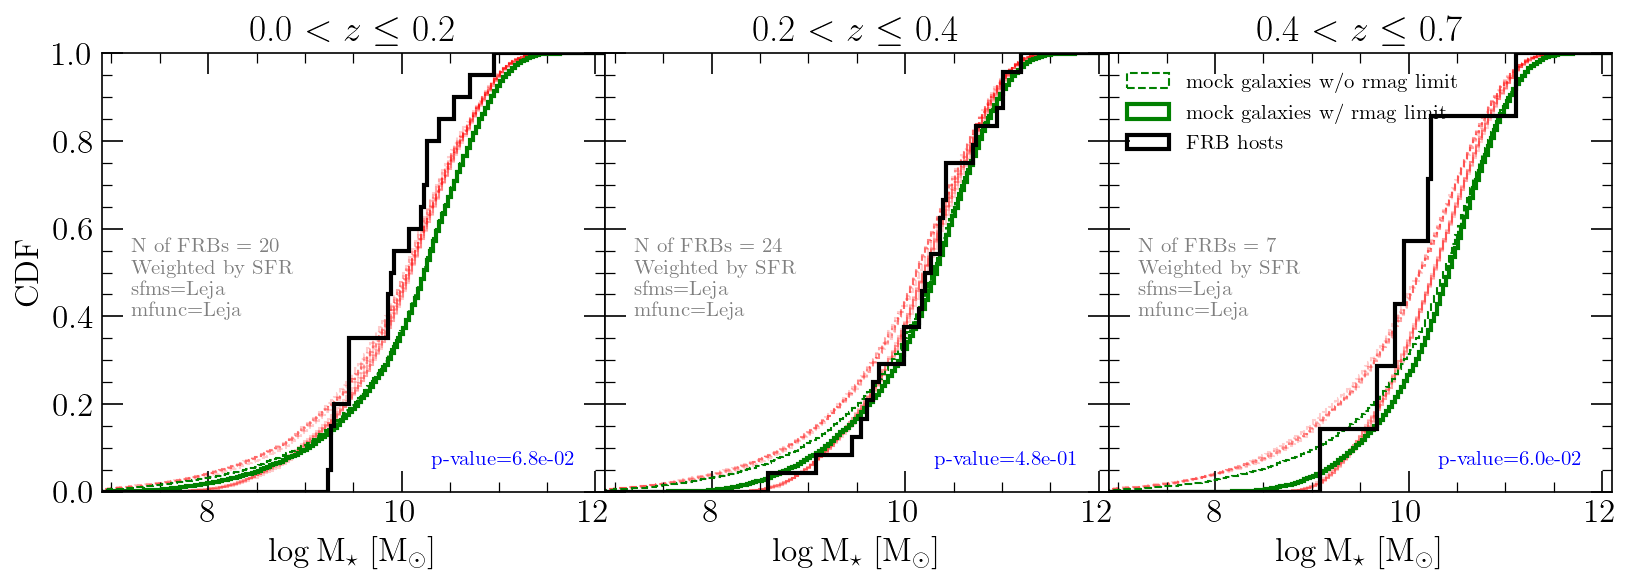

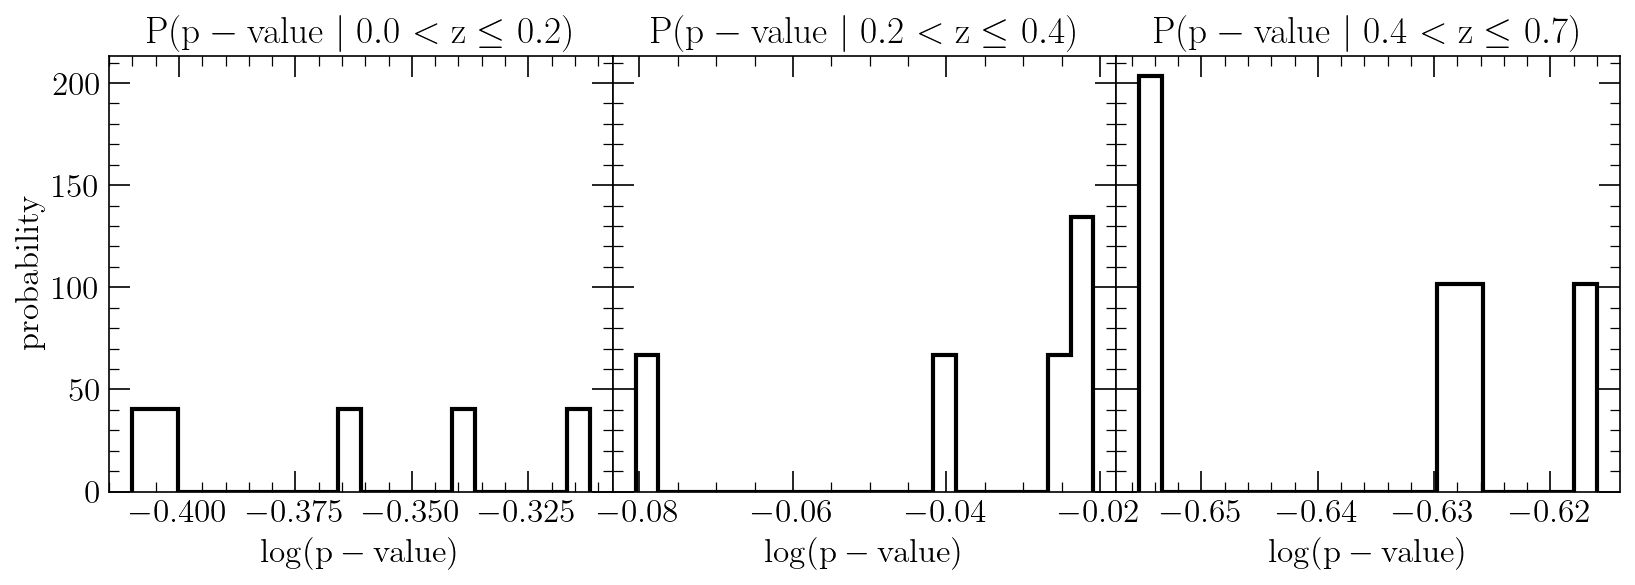

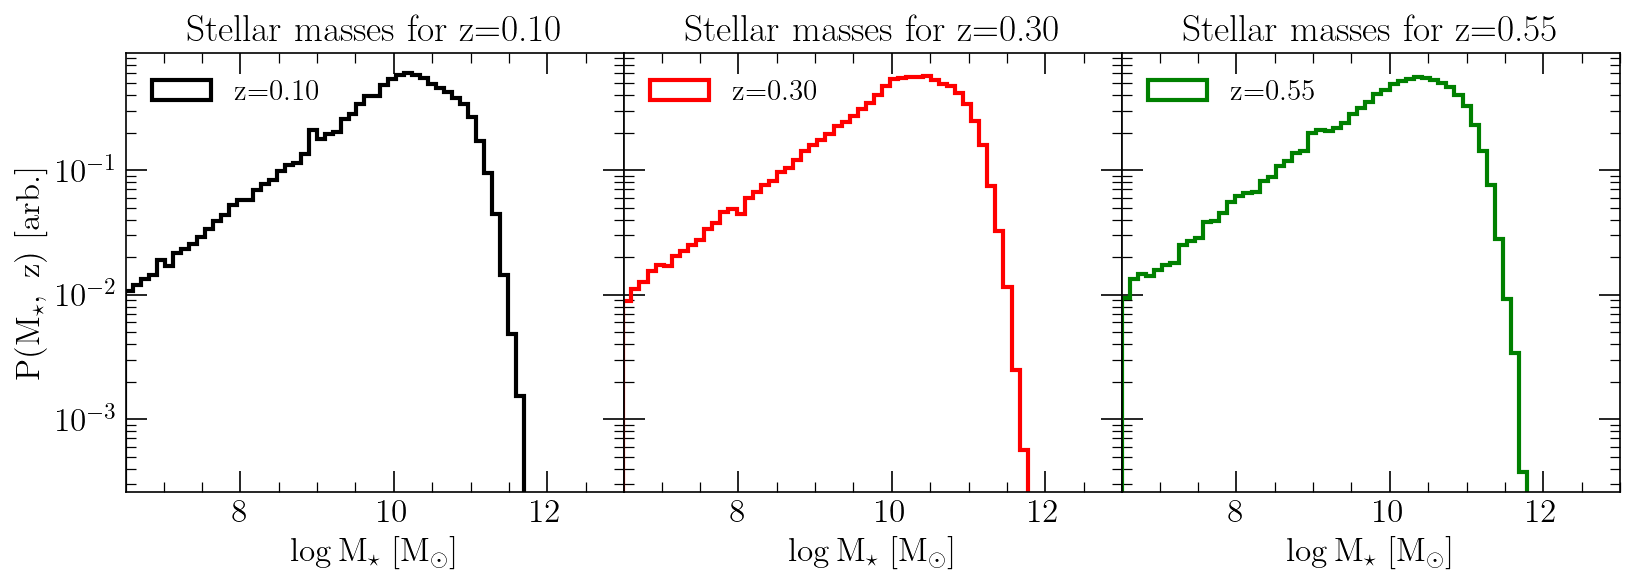

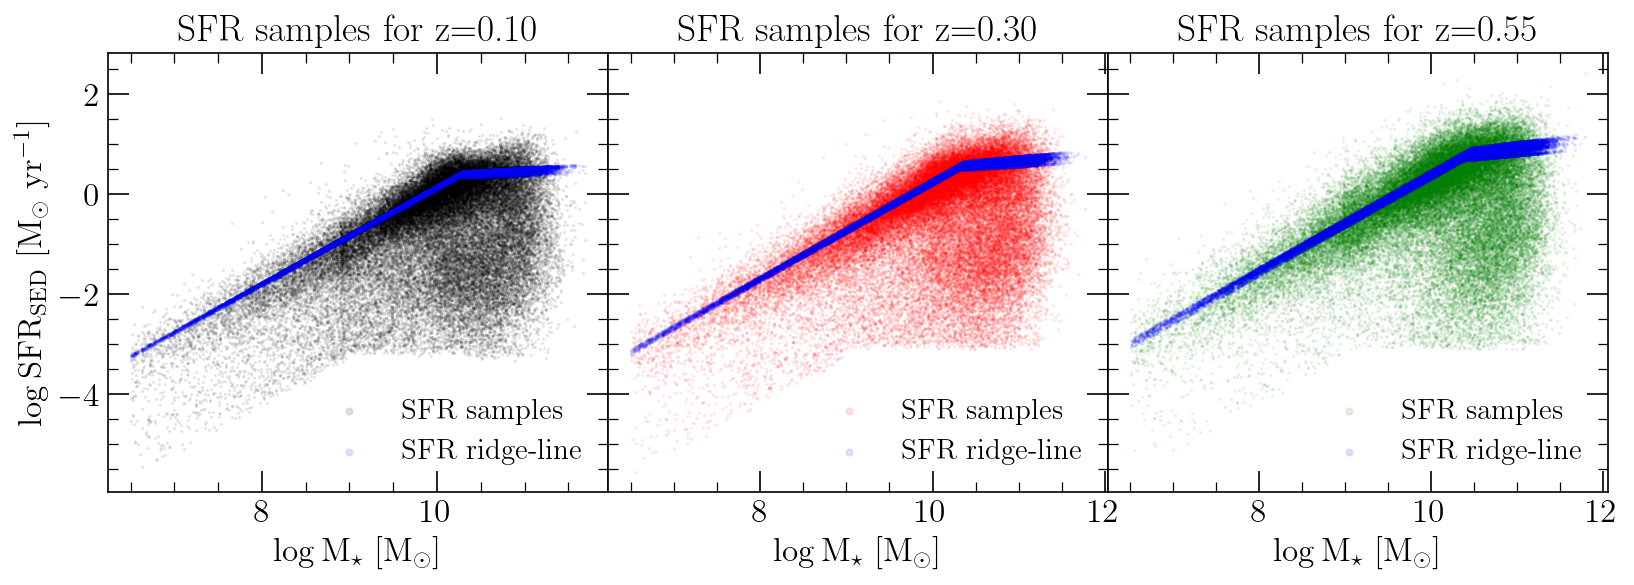

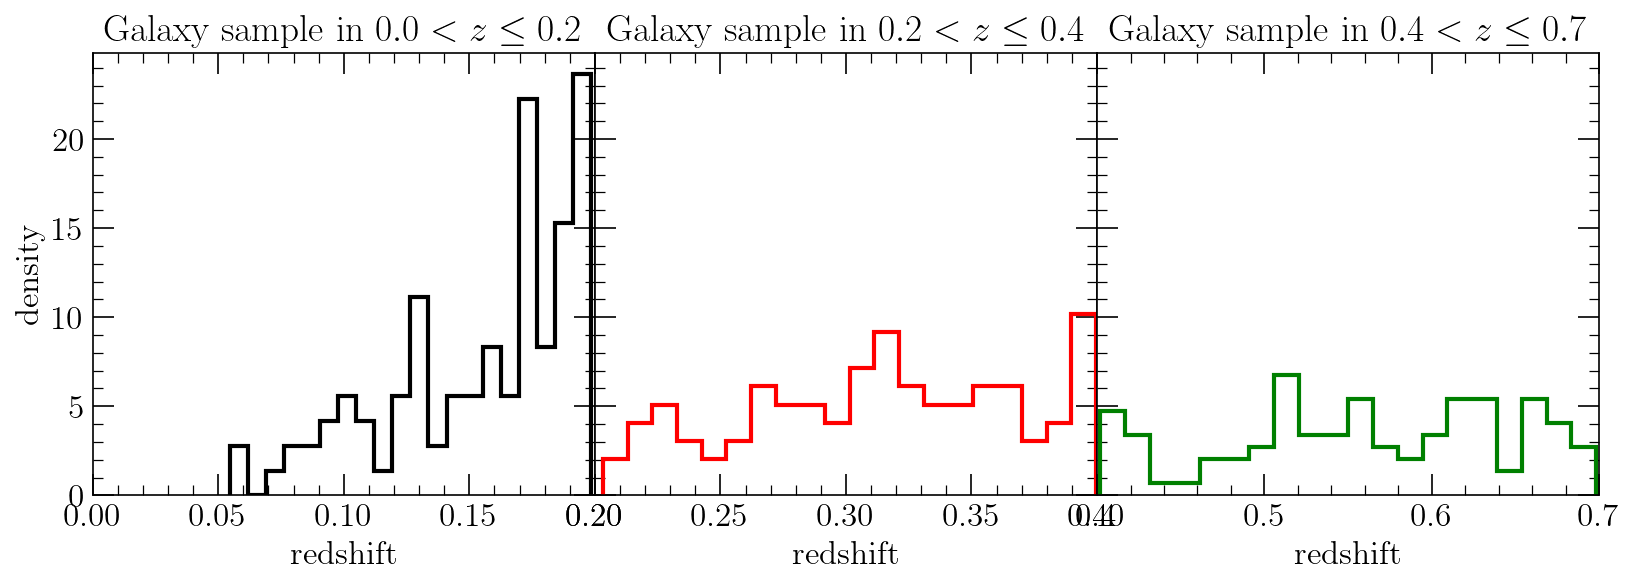

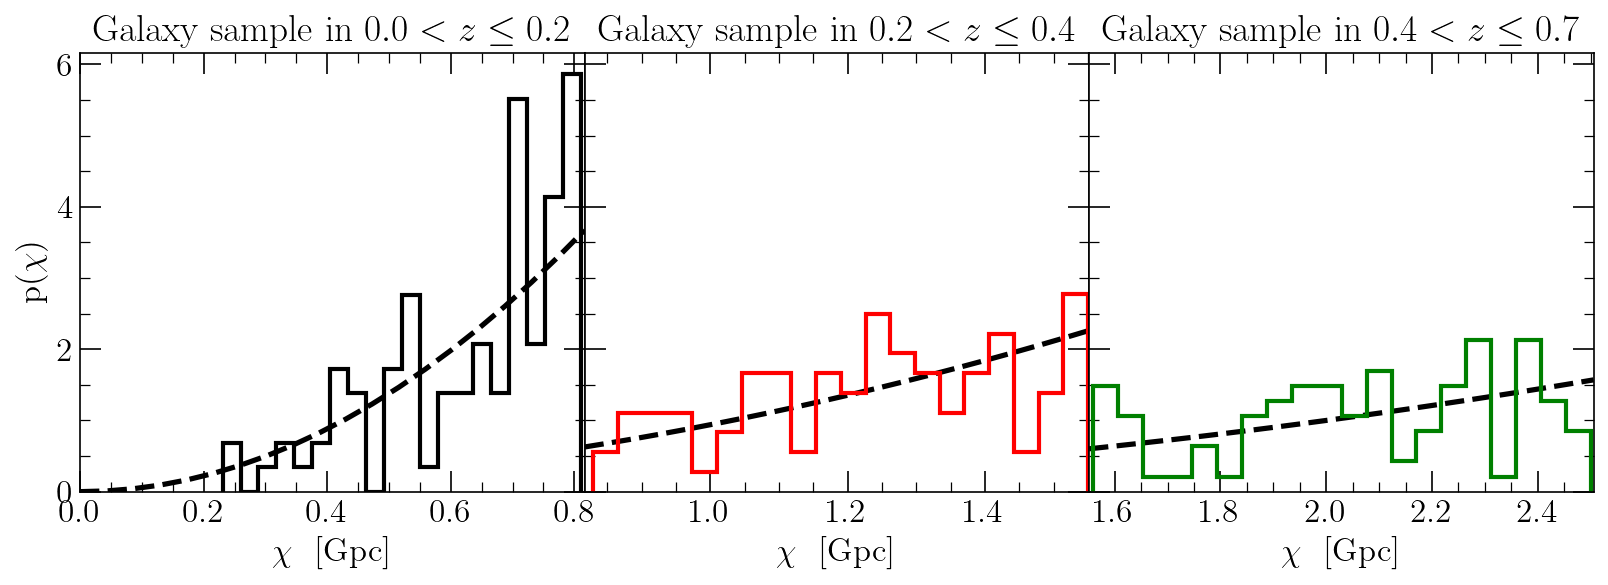

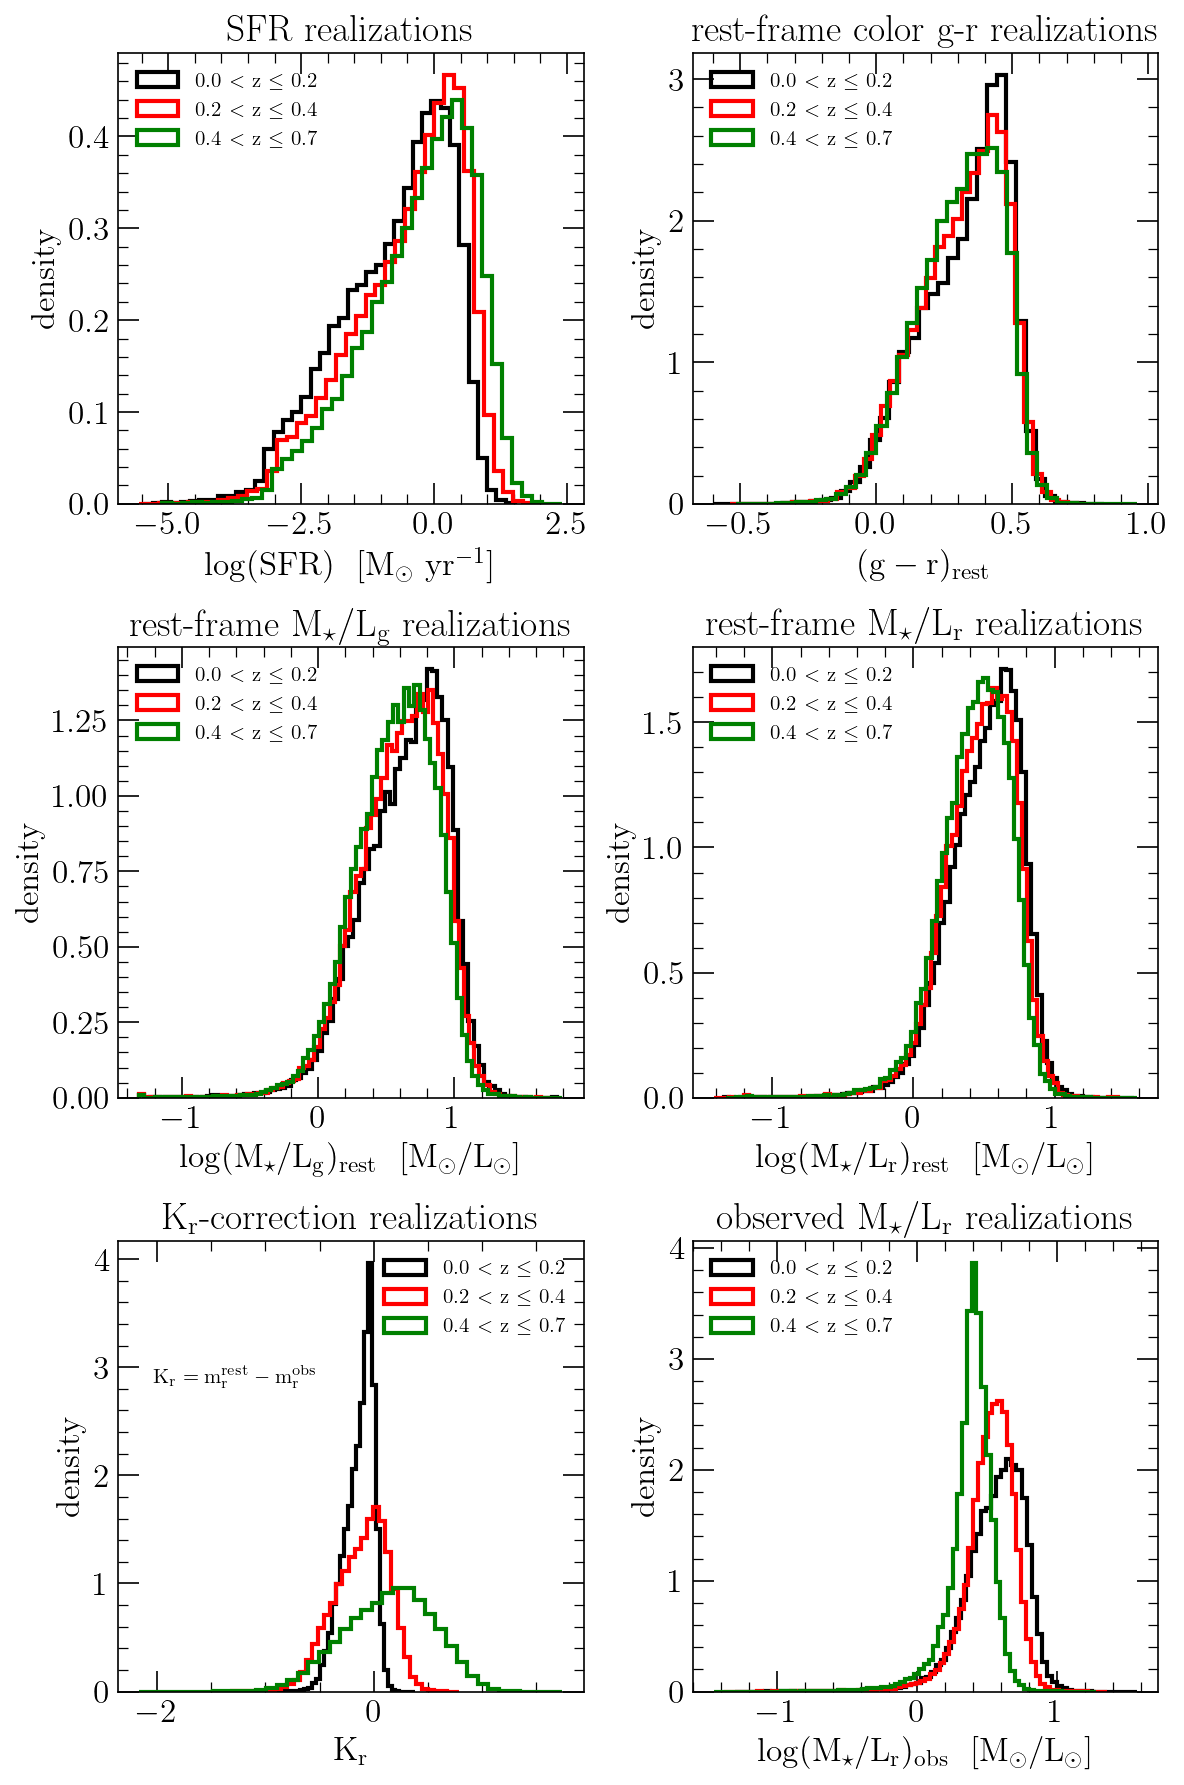

In [4]:
GFRB.mock_realization(zbins=[0.,0.2,0.4,0.7], 
                Nsample=10000, 
                zgal=[0.1,0.3,0.55], 
                weight='SFR',
                mfunc_ref='Leja',
                sfr_ref='Leja',
                mfunc_mstar0=1e5, 
                mfunc_slope=0, 
                mode='nn', 
                sfr_sampling=True,
                completeness_handling='sharma-like', 
                sigma_norm=12., 
                space_dist='uniform-vol',
                posterior=True, 
                plot_cdf_ridge = True,
                n_realizations=5, 
                nz_bins = 100, 
                transparency=0.2, 
                data_source='Sharma_full',
                ks_test=True, 
                p_dens_params=p_dens_params, 
                p_prob_arr=p_prob_arr, 
                p_z_arr=p_z_arr,
                p_logm_arr=p_logm_arr, 
                p_logsfr_arr=p_logsfr_arr, 
                ml_sampling='advanced',
                density_sfr_color=sdss_density_logsfr_color, 
                sfr_grid=sdss_logsfr_grif, 
                color_gr_grid=sdss_color_grid,
                Kr_correction=True, 
                plot_M_L=True, 
                store_output=True
                )

In [ ]:
#EOF